# DP0.2 Introduction

Owners: **PatriciaLarsen [@plarsen](https://github.com/LSSTDESC/DC2-analysis/issues/new?body=@patricialarsen)**  
Last Verifed to Run: **2024-06-04** (by @plarsen)

DP0.2 is a Rubin Observatory LSST data preview, based on images from the DC2 data challenge by LSST-DESC (https://arxiv.org/abs/2010.05926). This was processed using version 23 of the [LSST Science Pipelines](https://pipelines.lsst.io/) on the wide-fast-deep (WFD) field with a baseline cadence. You can find a huge amount of information on the DP0.2 data [here](https://dp0-2.lsst.io/)

For the contexts of these tutorials we're showing how to use the DP0.2 data available on NERSC. This is for the most part catalog-level data stored in flat files, most often in parquet format. If you would like to use the full set of DP0.2 data available, you can do so by becoming a DP0.2 delegate and accessing the data on the RSP. Delegate applications are currently open to all data rights holders, and you can follow the instructions [here](https://dp0.lsst.io/delegate-resources/index.html). 


## The Simulation (DC2)

### DC2
DC2 is an ambitious data challenge going all the way from N-body simulations to LSST-like images, followed by mock observations. These include a number of complex effects including stellar contamination, galactic reddening, varying observing conditions, survey strategy and instrumental and detector artifacts. The extragalactic catalog is described in https://arxiv.org/abs/1907.06530, with the validation framework in https://arxiv.org/abs/2110.03769, and the image simulation campaign in https://arxiv.org/abs/2010.05926. The processing was run using version 19.0.0 of the LSST Science Pipelines. The data can be found at NERSC, with a data product overview found [here](https://confluence.slac.stanford.edu/display/LSSTDESC/DC2+Data+Product+Overview) and many tutorials showing how to access and inspect this data at http://lsstdesc.org/DC2-analysis/.   

<img src=attachment:41d2aaeb-15cc-46b5-9bc4-e5b78fc29401.png width="950">

LSST Dark Energy Science Collaboration et al. 2021

### DP0.2
By contrast DP0.2 is a reprocessing of these images with version 23.0.0 of the LSST Science Pipelines, run by the Rubin Observatory. For comparison purposes and as an example data preview we have copied over the object catalogs to NERSC, and I will walk you through how to access this data in the following tutorials.  
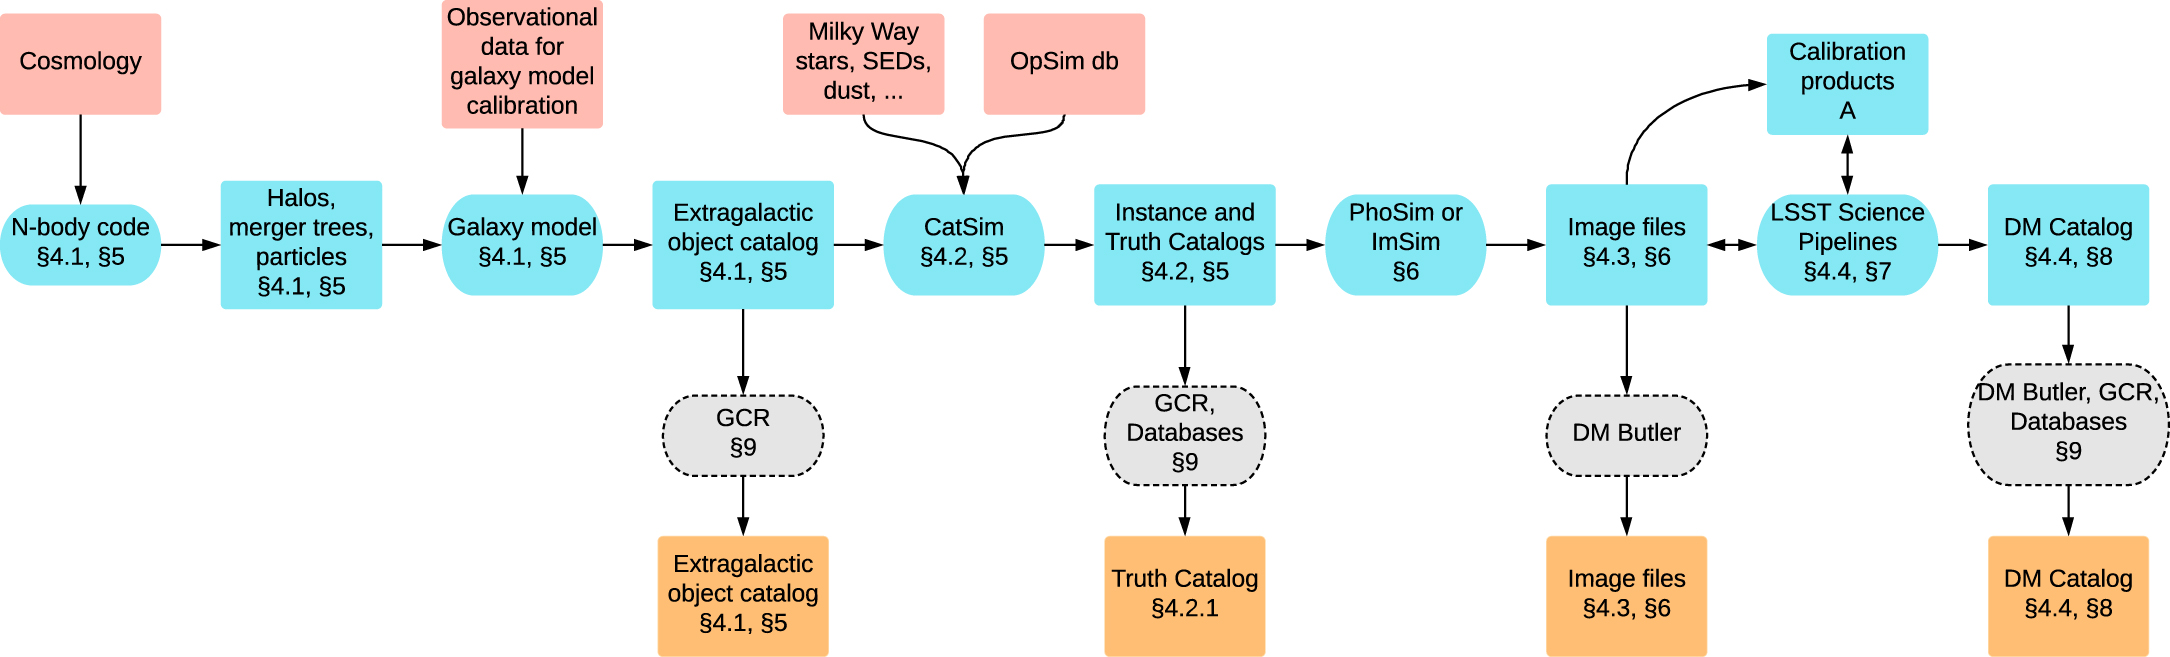

## The processing pipeline

The LSST Science Pipelines have 4 main steps (see Bosch 2018, 2019 for full details - there are also nice visualizations in the data products definition document at https://lse-163.lsst.io/)

- Single frame processing
  - This includes tasks like ISR (instrument signature removal), background subtraction, PSF (point spread function) modeling, cosmic ray detection and interpolation, and source detection, deblending and measurement
- Calibration 
  - Here the measurements are compared to reference catalogs to determine photometric and astrometric calibrations, this generates the "calexps" or calibrated exposures 
- Image coaddition
  - Single visit images are sampled on a fixed grid of pixels within "patches" (where patches are contained within "tracts"), and a weighted mean of the visits is used to create a coadd of all the visits. 
- Coadd processing
  - This involves source detection in each photometric band, merging across bands, deblending merged detections, measuring object properties, identifying a "reference" band and combining object catalogs from the different bands, and performing forced photometry measurements in each band using reference band positions and shapes.  

Treated separately, there is a final step of performing metadetection on the images to create shear catalogs. This was not performed on DP0.2 so I'll leave that discussion to future catalogs. Although the steps are much the same, there are significant differences between versions 19 and 23 of the pipelines. The most notable of these is a different deblender algorithm.   

*note to self add more about the differences


## The data products

The full set of data products in the data release is listed in the data products definition document: https://lse-163.lsst.io/, alongside the schema which can also be found at https://dm.lsst.org/sdm_schemas/browser/dp02.html.  

The data that has been transferred to nersc is the 
- Object catalog
  - This is the object catalog of sources measured on the coadds
- MatchesTruth catalog
  - This provides a match between the objects and the DC2 truth catalog, for validation purposes


These are available at this location ... 

## Use of DP0.2

DP0.2 was primarily used to test and validate the pipelines, and to serve as a first estimate of what the data will look like. Here we are using it as a trial for guidance from the SRV group on how to access the data, apply recommended cuts, use existing validation tools, and track known issues. 

We are still some time away from receiving data releases, and so this is subject to change, but you can expect that testing pipelines on DP0.2 will be a good test for data readiness. 